In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
x = pd.read_csv(r'C:\Users\shivam parihari\OneDrive\Desktop\ds_shivamparihari\csv_files\fear_greed_index.csv')
y = pd.read_csv(r'C:\Users\shivam parihari\OneDrive\Desktop\ds_shivamparihari\csv_files\historical_data.csv')


In [8]:
x.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [9]:
x.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [10]:
y.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [11]:
from datetime import datetime

In [12]:
y.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [13]:
x['date'] = pd.to_datetime(x['date'])  
x['date'] = x['date'].dt.strftime('%d/%m/%Y')  


In [14]:
x.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,01/02/2018
1,1517549400,15,Extreme Fear,02/02/2018
2,1517635800,40,Fear,03/02/2018
3,1517722200,24,Extreme Fear,04/02/2018
4,1517808600,11,Extreme Fear,05/02/2018


In [15]:
y['Timestamp IST'] = pd.to_datetime(y['Timestamp IST'], format='%d-%m-%Y %H:%M')

y['date_only'] = y['Timestamp IST'].dt.date
y['date_only'] = pd.to_datetime(y['date_only'])


In [16]:
y['date_only'] = pd.to_datetime(y['date_only'])
x['date'] = pd.to_datetime(x['date'], dayfirst=True)

merged_df = pd.merge(y, x, left_on='date_only', right_on='date', how='left')


In [17]:
merged_df.head(200)
merged_df['Closed PnL'].unique()

array([   0.      , 3008.231185,   30.741534, ..., -112.5773  ,
        -22.4402  ,  -53.9063  ])

In [18]:
merged_df.dtypes

Account                     object
Coin                        object
Execution Price            float64
Size Tokens                float64
Size USD                   float64
Side                        object
Timestamp IST       datetime64[ns]
Start Position             float64
Direction                   object
Closed PnL                 float64
Transaction Hash            object
Order ID                     int64
Crossed                       bool
Fee                        float64
Trade ID                   float64
Timestamp                  float64
date_only           datetime64[ns]
timestamp                  float64
value                      float64
classification              object
date                datetime64[ns]
dtype: object

In [19]:
merged_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,date_only,timestamp,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02


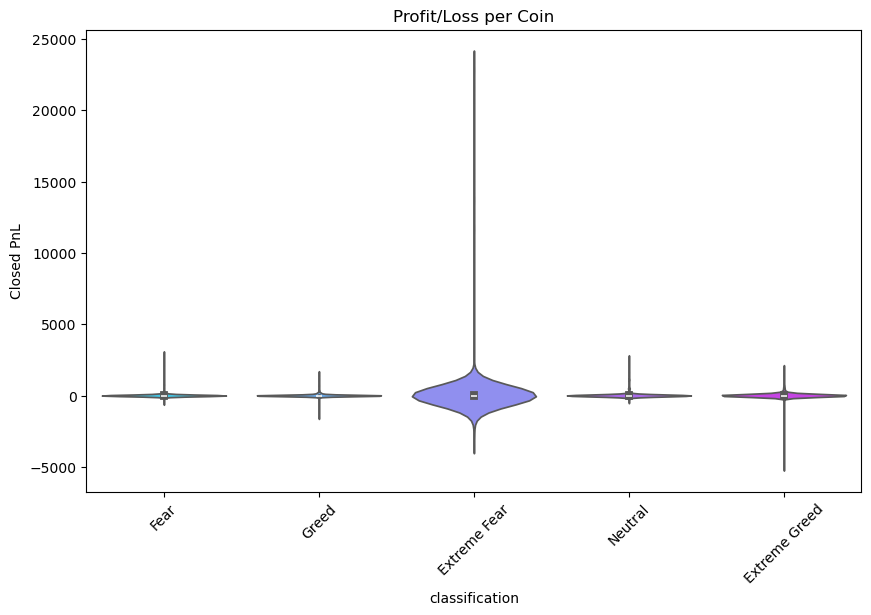

In [20]:
import warnings
warnings.filterwarnings("ignore")
sample_df = merged_df.sample(n=2000, random_state=42)
plt.figure(figsize=(10,6))
sns.violinplot(data=sample_df, x='classification', y='Closed PnL',palette='cool')
plt.title('Profit/Loss per Coin')
plt.xticks(rotation=45)
plt.savefig("Profit_Loss_per_Coin.png",bbox_inches='tight')
plt.show()

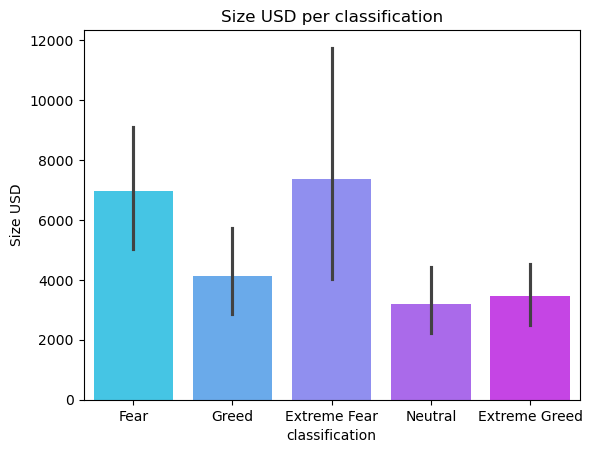

In [21]:
sns.barplot(data=sample_df, x='classification', y='Size USD', palette='cool')
plt.title('Size USD per classification')
plt.savefig("Size_USD_per_classification.png")
plt.show()

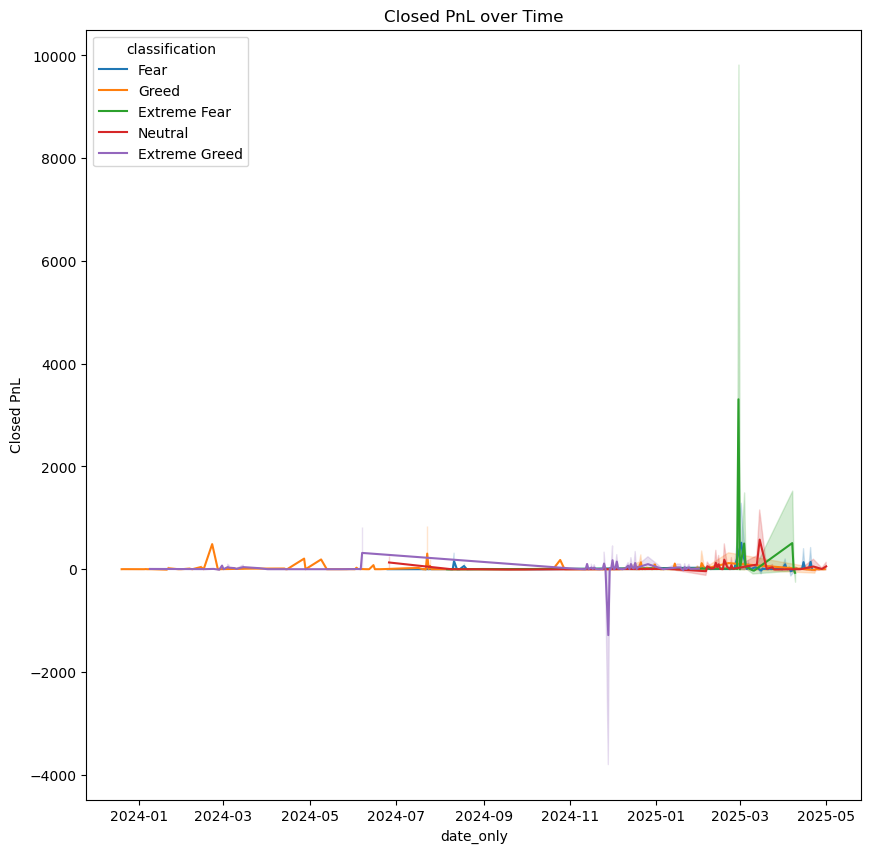

In [22]:
plt.figure(figsize=(10,10))
sns.lineplot(data=sample_df, x='date_only', y='Closed PnL',hue='classification')
plt.title('Closed PnL over Time')
plt.savefig("Closed_PnL_over_Time.png")
plt.show()

In [23]:
numeric_df = sample_df.select_dtypes(include='number')


In [24]:
c=numeric_df.corr()

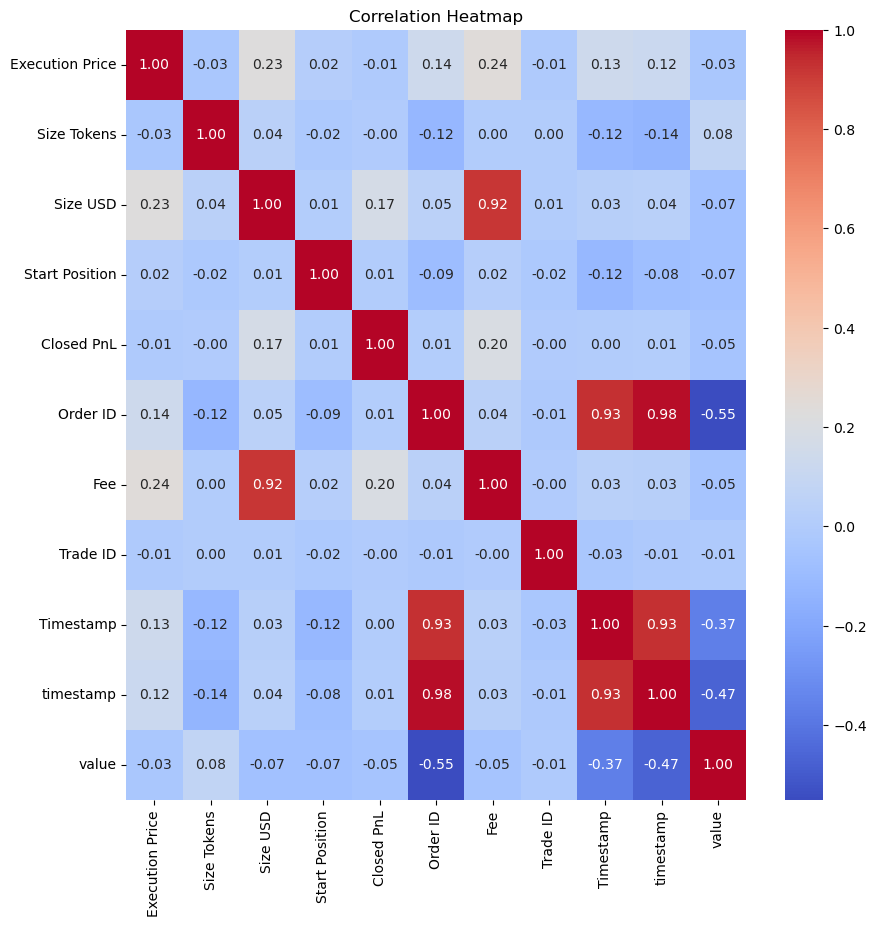

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(c, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')


plt.savefig("Correlation_Heatmap.png")
plt.show()


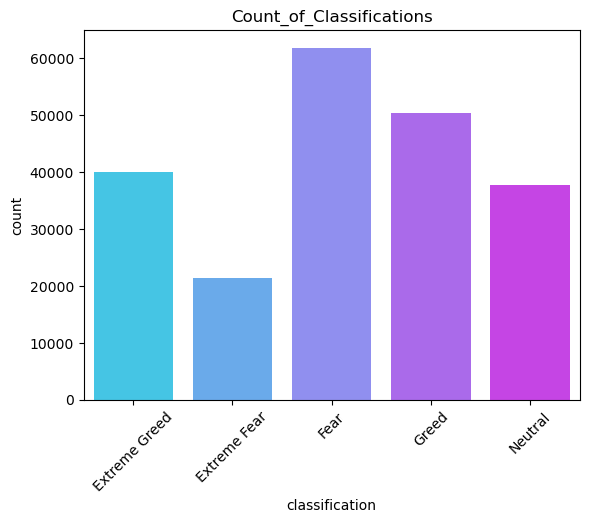

In [26]:
sns.countplot(data=merged_df, x='classification', palette='cool')
plt.title('Count_of_Classifications')
plt.xticks(rotation=45)


plt.savefig("Count_of_classififcations.png", bbox_inches='tight')
plt.show()


In [27]:
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,date_only,timestamp,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02


In [28]:
merged_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date_only', 'timestamp', 'value', 'classification',
       'date'],
      dtype='object')

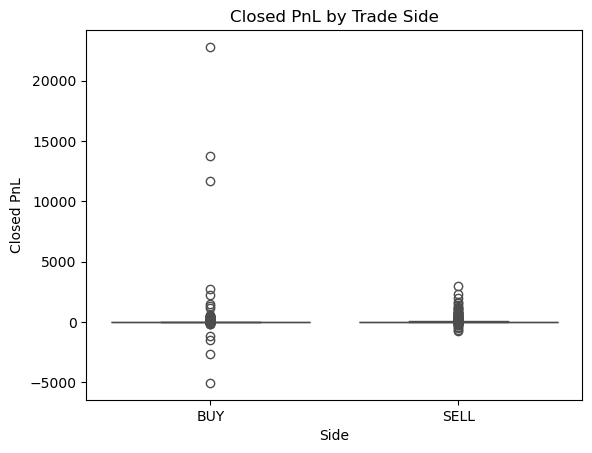

In [29]:
import seaborn as sns
sns.boxplot(data=sample_df, x='Side', y='Closed PnL',color='blue')
plt.title('Closed PnL by Trade Side')
plt.savefig("closed_pnl_by_side.png")
plt.show()


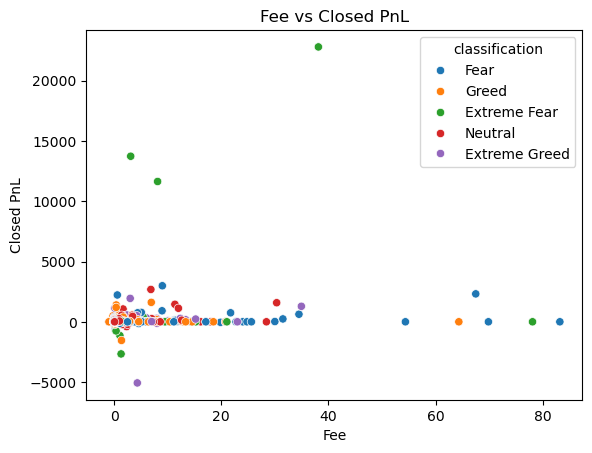

In [30]:
sns.scatterplot(data=sample_df, x='Fee', y='Closed PnL', hue='classification')
plt.title('Fee vs Closed PnL')
plt.savefig("fee_vs_closed_pnl.png")
plt.show()


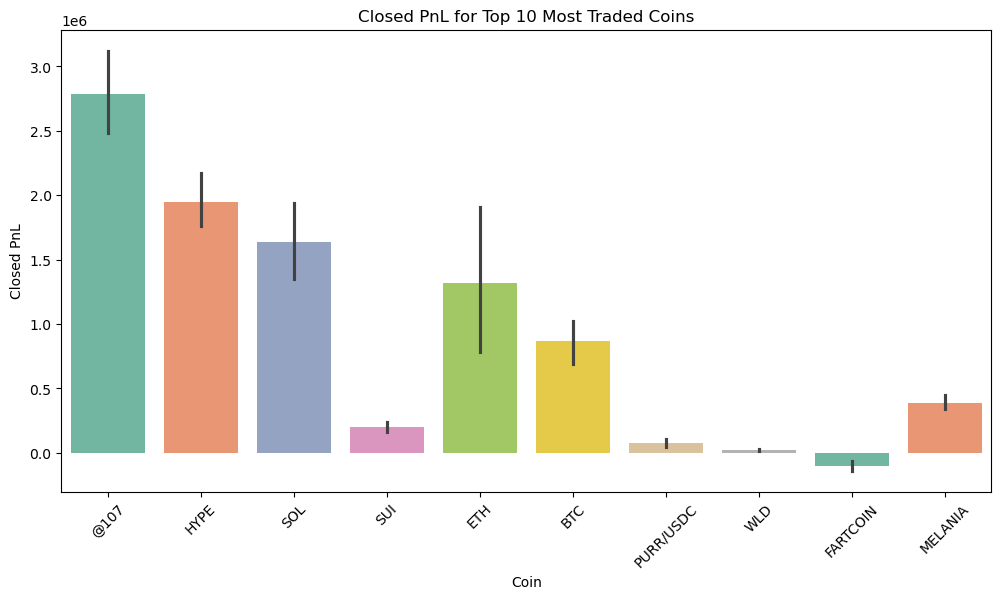

In [31]:
top_coins = merged_df['Coin'].value_counts().head(10).index
filtered_df = merged_df[merged_df['Coin'].isin(top_coins)]
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_df, x='Coin', y='Closed PnL', estimator='sum',palette='Set2')
plt.xticks(rotation=45)
plt.title("Closed PnL for Top 10 Most Traded Coins")
plt.savefig("Closed_PnL_for_Top_10_Coins.png")
plt.show()


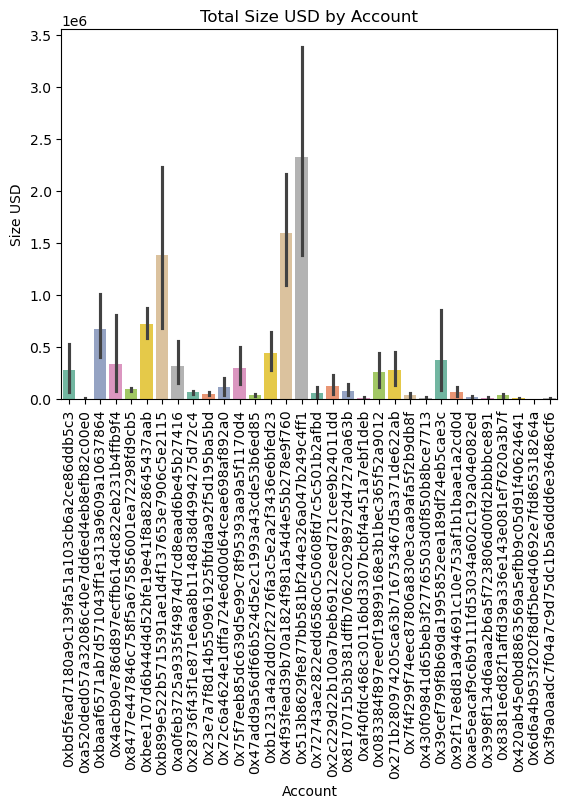

In [32]:
sns.barplot(data=sample_df, x='Account', y='Size USD', estimator='sum', palette='Set2')
plt.xticks(rotation=90)
plt.title('Total Size USD by Account')
plt.savefig("Total_Size_USD_by_Account.png", bbox_inches='tight')

plt.show()

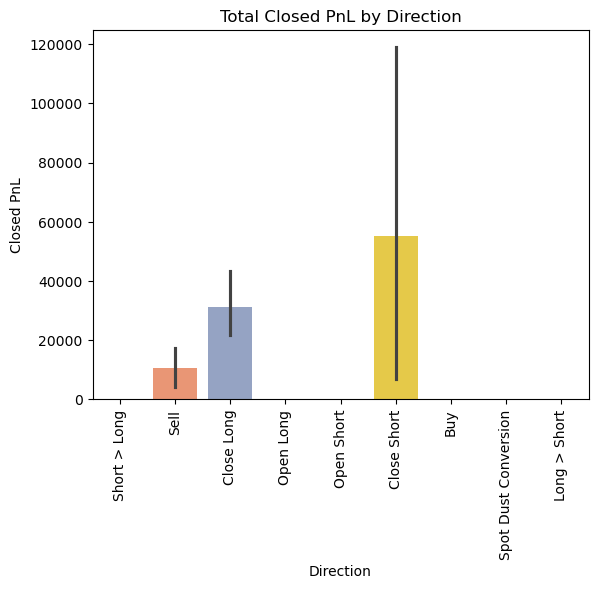

In [33]:
sns.barplot(data=sample_df, x='Direction', y='Closed PnL', estimator='sum', palette='Set2')
plt.title('Total Closed PnL by Direction')
plt.xticks(rotation=90)
plt.savefig("Total_Closed_PnL_by_Direction.png", bbox_inches='tight')
       
plt.show()